In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('insurance.csv')
df.shape


(1338, 7)

#Download the Data^#


In [25]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes

df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#Converting any non-numerical data to numbers based on category^#

In [30]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Checking for empty values in the dataset#

In [31]:
X = df.drop(columns = 'charges')
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


#Removing the label from the data frame to create an input matrix#

In [32]:
y = df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train,y_train)


LinearRegression()

#Create and train a linear regression model on the training data after the train/test split#

In [37]:
weights = lin_reg1.coef_
print(weights)

[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


#outputs the multiple weights in the regression equation after training the model#

In [39]:
y_pred_train = lin_reg1.predict(X_train)
y_pred_train

array([33388.19026849,  3615.42984257, 30678.69073769, ...,
        6132.68612727,  4519.17314626,  2373.39921419])

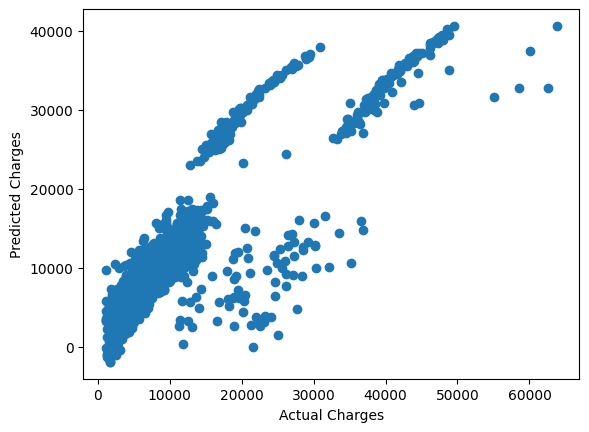

In [40]:
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R2 Score: ',r2_score(y_train,y_pred_train))
print('MSE: ',mean_squared_error(y_train,y_pred_train))

R2 Score:  0.7368306228430944
MSE:  37729580.5098492


In [42]:
y_pred_test = lin_reg1.predict(X_test)
y_pred_test

array([ 1.10172305e+04,  9.78753017e+03,  3.79947821e+04,  1.61227784e+04,
        6.93075923e+03,  3.96902046e+03,  1.55178430e+03,  1.42832091e+04,
        8.95342886e+03,  7.43194558e+03,  4.54457668e+03,  1.02472753e+04,
        8.65710757e+03,  4.12619770e+03,  2.78113171e+04,  1.10395971e+04,
        1.12514458e+04,  6.03101003e+03,  8.17339252e+03,  2.70394424e+04,
        3.35778484e+04,  1.42670864e+04,  1.16850232e+04,  3.24069403e+04,
        4.41465153e+03,  9.14607182e+03,  1.12786921e+03,  1.00891473e+04,
        4.08782973e+03,  1.03569127e+04,  8.96224058e+03,  4.02452861e+04,
        1.54779185e+04,  1.36671353e+04,  2.47415217e+04,  5.13005676e+03,
        1.28428861e+04,  3.05264017e+04,  3.34289155e+04,  3.48813457e+03,
        4.00215674e+03,  4.27800724e+03,  3.04613664e+04,  3.93491672e+04,
        2.80033682e+04,  5.00299253e+03,  1.09312243e+04,  7.77848493e+03,
        3.60829639e+03,  1.05573586e+04,  5.62958594e+03,  3.37882569e+03,
        3.28476568e+04,  

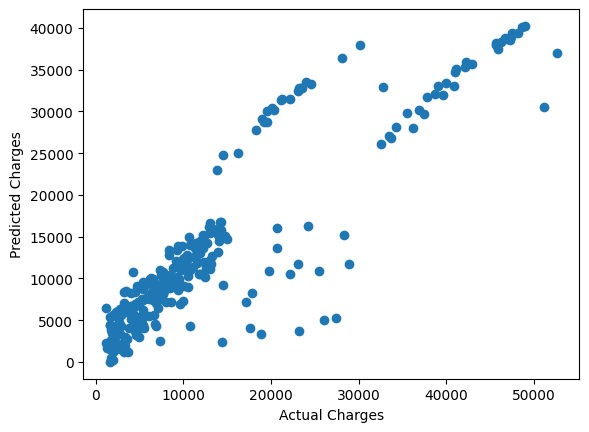

In [43]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [44]:
print('R2 Score: ',r2_score(y_test,y_pred_test))
print('MSE: ',mean_squared_error(y_test,y_pred_test))

R2 Score:  0.7998747145449959
MSE:  31845929.13415943
